<a href="https://colab.research.google.com/github/PSLeon24/LearnAI/blob/main/Predict_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>목표: 당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델 만들기</h1>

## 1. 문제 해결을 위해 당뇨병 환자의 데이터 준비하기

In [1]:
# 1. load_diabetes() 함수로 당뇨병 데이터 준비하기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
type(diabetes) # diabetes 변수에 저장된 값의 자료형은 파이썬 딕셔너리(dictionary)와 유사한 Bunch 클래스이다.

sklearn.utils._bunch.Bunch

In [3]:
# 2. 입력과 타깃 데이터의 크기 확인하기
# diabetes의 속성 중 data 속성과 target 속성에는 입력과 타깃 데이터가 넘파이 배열로 저장되어 있는데 shape 속성으로 확인할 수 있다.
print(f'Data Shape: {diabetes.data.shape}')
print(f'Target Shape: {diabetes.target.shape}')

Data Shape: (442, 10)
Target Shape: (442,)


data는 442x10 크기의 2차원 배열이고 tartget은 442개의 요소를 가진 1차원 배열임을 확인할 수 있다.<br>
이때, diabetes.data에서 행은 샘플(sample)이고, 열은 샘플의 특성(feature)이다.<br>
샘플: 당뇨병 환자에 대한 특성으로 이루어진 데이터 1세트<br>
특성: 당뇨병 데이터의 여러 특징들(ex: 환자의 혈압, 혈당, 몸무게, 키) = 독립 변수(independent variable)
<br>
즉, 특성(특징)들의 수치를 모아 1세트로 만들면 1개의 샘플이 된다.

In [4]:
diabetes.data[:5] # diabetes.data에 저장된 입력 데이터 중 앞부분의 샘플 5개만 출력

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [5]:
diabetes.target[:5] # diabetes.target에 저장된 데이터 중 앞부분의 샘플 5개만 출력
# 타깃 데이터는 10개의 요소로 구성된 샘플 1개에 대응됨

array([151.,  75., 141., 206., 135.])

이 예제를 풀기 위해 data의 입력 데이터와와 target 데이터의 수치를 해석하는 것은 전문가인 의사의 영역이므로 이 둘 사이의 규칙(모델)만 찾으면 된다.<br>
다만, 실전에서는 데이터의 의미를 아는 것이 매우 중요할 수 있으므로 전문가의 도움을 받는것이 좋다.

## 2. 당뇨병 환자 데이터 시각화하기

맷플롯립의 scatter() 함수로 산점도 그리기

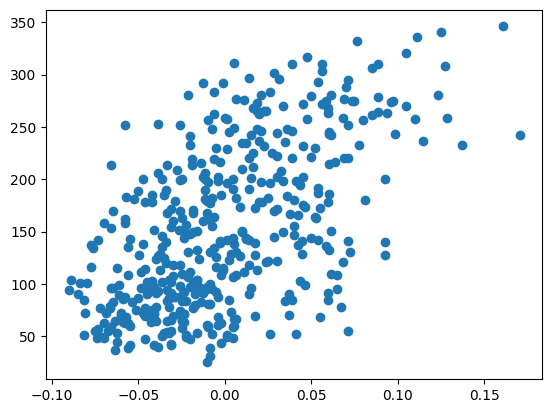

In [6]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target) # diabetes.data의 열(특성) 중 3번째(2)와 타깃 데이터로 산점도 그리기
# 그래프의 x축은 diabetes의 세 번째 특성, y축은 diabetes.target
plt.show()

위 그래프를 보면, 세 번째 특성(입력 데이터)과 타깃 데이터 사이에 정비례 관계가 있음을 확인할 수 있다.

## 3. 훈련 데이터 준비하기

In [7]:
x = diabetes.data[:, 2]
y = diabetes.target

## 4. 경사 하강법으로 학습
* 경사 하강법(gradient descent): 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

### 예측값: 모델에 대해 새로운 입력값을 넣으면 어떤 출력이 나오는데, 이 값을 <b>예측값</b>이라고 함<br>
훈련 데이터에 잘 맞는 w와 b를 찾는 방법<br>
1) 무작위로 w와 b를 정한다.(무작위 모델 생성)<br> 
2) x에서 샘플 하나를 선택하여 와이-햇(y^)을 계산한다.(무작위로 모델 예측)<br>
3) 와이-햇(y^)과 선택한 샘플의 진짜 y를 비교한다.(예측한 값과 진짜 정답 비교하기, 틀릴 확률 99%)<br>
4) 와이-햇(y^)이 y와 더 가까워지도록 w, b를 조정한다.(모델 조정)<br>
5) 모든 샘플이 처리될 때까지 2~4 항목을 반복한다.

In [8]:
# 1. w와 b를 무작위로 초기화하기
w = 1.0
b = 1.0

In [10]:
# 2. 훈련 데이터의 첫 번째 샘플 데이터로 와이-햇(y^) 얻기
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [11]:
# 3. 타깃과 예측 데이터 비교하기
print(y[0])

151.0


In [12]:
# 4. 모델 조정하기(예측한 y^은 1.06, 실제 타깃의 y는 151.0)
# 모델 조정을 위해 먼저, w를 0.1만큼 증가시키고 y_hat의 변화량을 살펴보기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


In [13]:
# 5. w 값 조정한 후 예측값 증가 정도 확인하기
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


위에서 계산한 값인 0.0616...을 첫 번쨰 훈련 데이터 x[0]에 대한 w의 <b>변화율</b>이라고 한다.<br>
w_rate에 대한 코드를 수식으로 정리하면 변화율은 결국 훈련 데이터의 첫 번째 샘플인 x[0]임을 알 수 있다.<br>
w = 1.0, b = 1.0<br>
y_hat = x[0] * w + b - b = 0.0616...<br>

### 변화율로 가중치 업데이트하기
- 변화율이 양수일 때 가중치를 업데이트 하는 방법
  - w가 증가하면 y_hat도 증가한다. 즉, 변화율이 양수인 점을 이용해 변화율을 w에 더하는 방법으로 w를 증가시킬 수 있다.(w + w_rate)
- 변화율이 음수일 때 가중치를 업데이트 하는 방법
  - w가 증가하면 y_hat은 감소한다. 반대로 생각하면 w가 감소하면 y_hat은 증가한다.
  - 이때 변화율이 음수인 점을 이용하면 변화율을 더하는 방법으로 y_hat의 값을 증가시킬 수 있다.(w + w_rate)

### 변화율로 절편 업데이트하기

In [14]:
# b를 0.1만큼 증가시킨 후 y_hat이 얼마나 증가했는지 계산하고 변화율도 계산해보기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186833
1.0


위의 방식과 같이 w와 b를 업데이트하는 방법은 수동적인 방법인데 w와 b를 더 능동적으로 업데이트하는 방법인 <b>오차 역전파</b>에 대해 알아보고자 한다.

### 오차 역전파(backpropagation)
- y^(y_hat)과 y의 차이를 이용하여 w와 b를 업데이트하는 방법이다.
- 이름에서 알 수 있듯이 이 방법은 오차가 연이어 전파되는 모습으로 수행된다.
<br>

### 가중치와 절편을 더욱 적절하게 업데이트하는 방법
- 앞에서는 변화율만으로 w와 b를 업데이트했으나 이번에는 y-y^(error: 오차)의 양을 변화율에 곱하는 방식으로 업데이트해 볼 것이다.<br>
- 이렇게 하면 y^이 y보다 많이 작은 경우 w와 b를 많이 바꿀 수 있고 y^이 y를 지나치면 w와 b의 방향도 바꿔준다.

In [15]:
# 1. 오차와 변화율을 곱하여 가중치 업데이트하기
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


x[0]일 때 w의 변화율과 b의 변화율에 오차를 곱한 다음 업데이트된 결과값을 보면 w와 b가 각각 큰 폭으로 바뀌었음을 알 수 있다.

In [16]:
# 2. 두 번째 샘플 x[1]을 사용하여 새로운 w와 b를 구하기
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


x[1]일 때 w는 4만큼 커지고 b는 절반(약 150에서 75)로 줄었다.<br>
이러한 방식으로 모든 샘플을 사용해 가중치와 절편을 업데이트한다.

In [17]:
# 3. 전체 샘플을 반복하기
for x_i, y_i in zip(x,y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err

print(w, b)

587.8654539985616 99.4093556453094


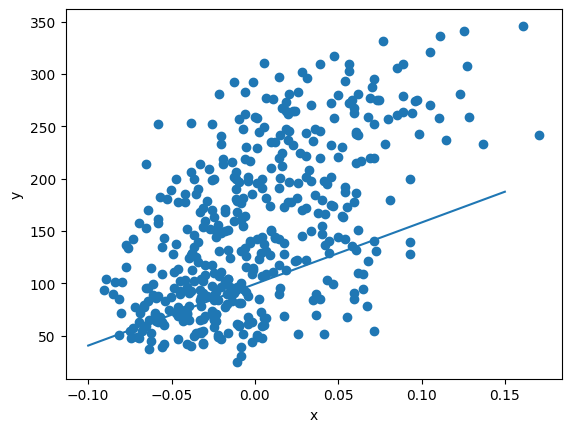

In [19]:
# 4. 전체 샘플을 반복해서 얻어낸 모델이 전체 데이터 셋을 잘 표현하는지 그래프를 그려 확인해보기
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x좌표 2개[-0.1, 0.15]를 지정하고 y 좌표값은 w와 b를 사용해 계산해 그래프를 그려보았다.<br>
직선의 모양을 살펴보면 어느 정도 산점도를 잘 표현한 것으로 보인다.<br>
반복을 통해 조금 더 개선하고자 한다.

### 에포크
- 전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것(ex: 문제집 한 권 전체 1회독)

In [20]:
# 5. 여러 에포크를 반복하기
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


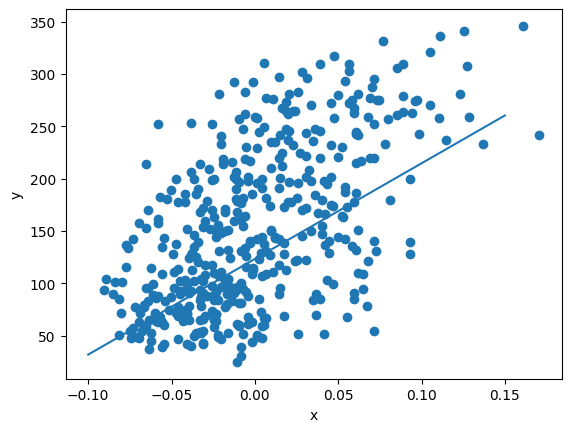

In [21]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

직선이 전체 데이터의 경향을 제법 잘 따라가는 것을 확인할 수 있다.<br>
이를 통해 구해진 머신러닝 모델은 아래와 같다.<br>
y^(y_hat) = 913.6x + 123.4

In [22]:
# 6. 모델로 예측하기

# 만약 x가 0.18일 때 y^의 값은 얼마일까?
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


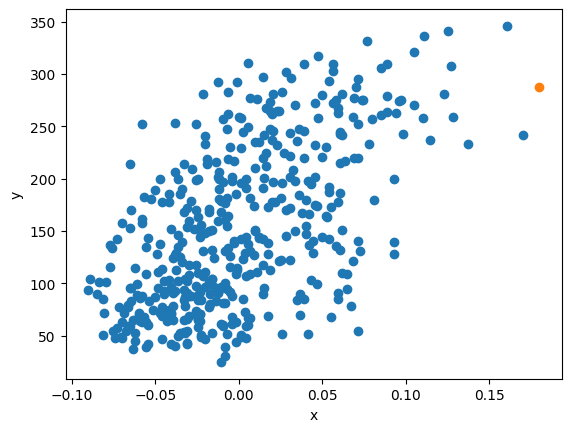

In [23]:
# 위 데이터를 산점도 위에 나타내기
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()